In [1]:
"""
FashionMNIST 데이터셋 다운로드하기.
"""

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


i: 1
  sample_idx: 44082
    img.shape: torch.Size([1, 28, 28])
    label: 2
i: 2
  sample_idx: 16717
    img.shape: torch.Size([1, 28, 28])
    label: 2
i: 3
  sample_idx: 40702
    img.shape: torch.Size([1, 28, 28])
    label: 6
i: 4
  sample_idx: 40785
    img.shape: torch.Size([1, 28, 28])
    label: 5
i: 5
  sample_idx: 50167
    img.shape: torch.Size([1, 28, 28])
    label: 2
i: 6
  sample_idx: 2319
    img.shape: torch.Size([1, 28, 28])
    label: 6
i: 7
  sample_idx: 7844
    img.shape: torch.Size([1, 28, 28])
    label: 8
i: 8
  sample_idx: 1970
    img.shape: torch.Size([1, 28, 28])
    label: 1
i: 9
  sample_idx: 45085
    img.shape: torch.Size([1, 28, 28])
    label: 8


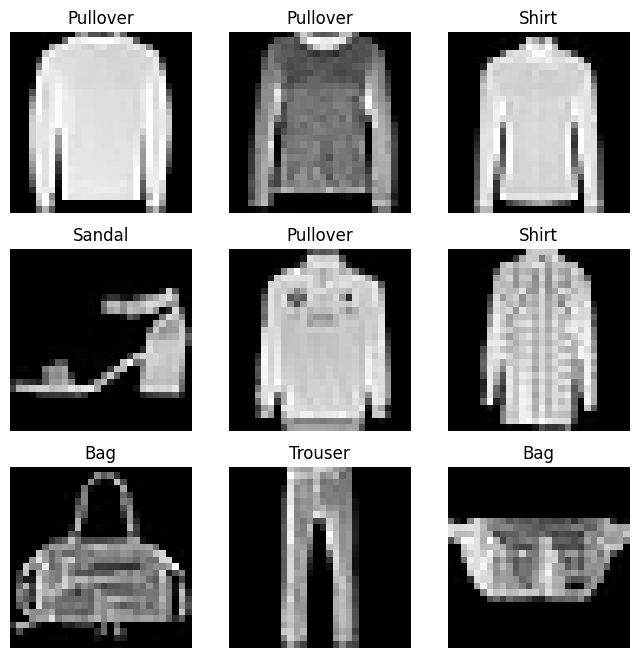

In [2]:
"""
FashionMNIST 데이터셋 시각화하기
"""

import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]

    print("i:", i)
    print("  sample_idx:", sample_idx) # ex) 11292
    print("    img.shape:", img.shape) # Tensor
    print("    label:", label) # 0~9

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [3]:
"""
FashionMNIST 데이터를 jpg와 csv로 추출하기.
"""

import os
import csv
from PIL import Image
from torchvision import datasets

dataset = datasets.FashionMNIST(root='./data', train=False, download=True)

os.makedirs("./images", exist_ok=True)

with open("labels.csv", "w", newline="") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["filename", "label"])
    for idx, (image, label) in enumerate(dataset):
        filename = f"img{idx}.jpg"
        image_path = os.path.join("./images", filename)
        image.save(image_path)
        csv_writer.writerow([filename, label])


In [4]:
"""
커스텀 데이터셋 만들기 (추출한 jpg와 csv를 사용)
사용자 정의 Dataset 클래스는 __init__, __len__, __getitem__을 구현해야 한다.
"""

import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, csv_filepath, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(csv_filepath, names=["filename", "label"])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        filename = self.img_labels.iloc[idx, 0] # 첫번째 열은 파일이름이다.
        img_path = os.path.join(self.img_dir, filename)
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1] # 두번째 열은 정답 레이블이다.
        label = int(label)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

training_data: Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
dataloader: <torch.utils.data.dataloader.DataLoader object at 0x000001694D34F4C0>
iter: 1 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 1 | index: 0 | label: 7


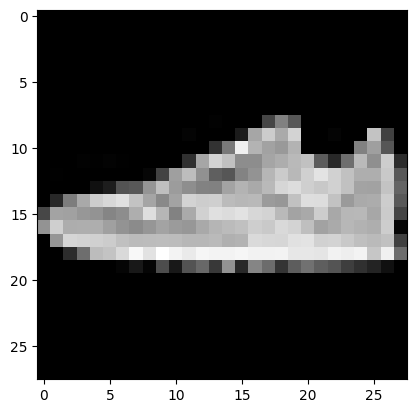

iter: 2 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 3 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 4 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 5 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 6 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 7 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 8 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 9 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 10 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 11 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 12 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])
iter: 13 | images.size: torch.Size([64, 1, 28, 28]) | labels.size: torch.Size([64])


In [12]:
"""
DataLoader로 데이터 읽기
"""

from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

print("training_data:", training_data)
dataloader = DataLoader(training_data, batch_size=64, shuffle=True, num_workers=8)
print("dataloader:", dataloader)

i = 1
for images, labels in dataloader:
    print(f"iter: {i} | images.size: {images.size()} | labels.size: {labels.size()}")
    if i == 1:
        img = images[0].squeeze()
        label = labels[0]
        plt.imshow(img, cmap="gray")
        print(f"iter: {i} | index: {0} | label: {label}")
        plt.show()
    i+=1